<a href="https://colab.research.google.com/github/Sushant0703/ML_Task/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting MNIST Image Classification
Dataset Loaded Successfully!
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)

Training the Model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7839 - loss: 0.7084 - val_accuracy: 0.9517 - val_loss: 0.1579
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9381 - loss: 0.2056 - val_accuracy: 0.9648 - val_loss: 0.1211
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9522 - loss: 0.1562 - val_accuracy: 0.9703 - val_loss: 0.1026
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9628 - loss: 0.1250 - val_accuracy: 0.9701 - val_loss: 0.0978
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9666 - loss: 0.1068 - val_accuracy: 0.9724 - val_loss: 0.0918

Evaluating the Model...

Test Accuracy: 97.34%
Test Loss: 0.0862

Visualizing Predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


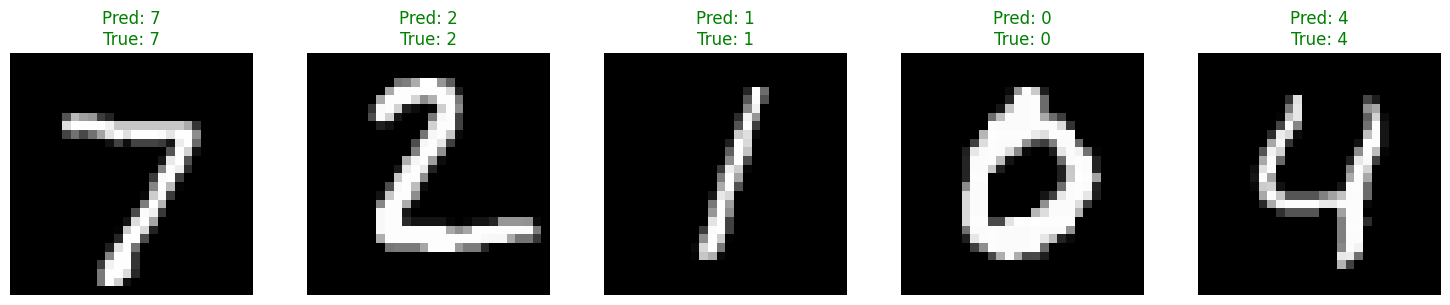

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class MNISTClassifier:
    def __init__(self):
        """
        Initialize the MNIST Classifier
        - Load MNIST dataset
        - Preprocess the data
        """
        # Load MNIST dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = keras.datasets.mnist.load_data()

        # Print dataset information
        print("Dataset Loaded Successfully!")
        print(f"Training images shape: {self.x_train.shape}")
        print(f"Training labels shape: {self.y_train.shape}")
        print(f"Testing images shape: {self.x_test.shape}")
        print(f"Testing labels shape: {self.y_test.shape}")

        # Preprocess the data
        self.preprocess_data()

    def preprocess_data(self):
        """
        Preprocess the image data
        - Reshape images
        - Normalize pixel values
        - One-hot encode labels
        """
        # Reshape images (flatten and normalize)
        self.x_train = self.x_train.reshape(-1, 28*28).astype('float32') / 255.0
        self.x_test = self.x_test.reshape(-1, 28*28).astype('float32') / 255.0

        # One-hot encode the labels
        self.y_train = keras.utils.to_categorical(self.y_train, 10)
        self.y_test = keras.utils.to_categorical(self.y_test, 10)

    def create_model(self):
        """
        Create a neural network model for digit classification
        """
        model = keras.Sequential([
            # Input layer
            layers.Input(shape=(784,)),

            # First hidden layer
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),

            # Second hidden layer
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),

            # Output layer
            layers.Dense(10, activation='softmax')
        ])

        # Compile the model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train_model(self, epochs=10, batch_size=64):
        """
        Train the neural network model
        """
        # Create the model
        self.model = self.create_model()

        # Print model summary
        self.model.summary()

        # Train the model

        return self.model.fit(
            self.x_train, self.y_train,
            validation_split=0.2,  # Use 20% of training data for validation
            epochs=epochs,
            batch_size=batch_size,
            verbose=1  # Show training progress
        )

    def evaluate_model(self):
        """
        Evaluate the model on test data
        """
        # Evaluate the model
        test_loss, test_accuracy = self.model.evaluate(
            self.x_test, self.y_test, verbose=0
        )

        print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
        print(f"Test Loss: {test_loss:.4f}")

    def visualize_predictions(self, num_images=5):
        """
        Visualize model predictions
        """
        # Make predictions
        predictions = self.model.predict(self.x_test[:num_images])

        # Create visualization
        plt.figure(figsize=(15, 3))
        for i in range(num_images):
            # Reconstruct the original image
            plt.subplot(1, num_images, i+1)
            plt.imshow(self.x_test[i].reshape(28, 28), cmap='gray')

            # Get predicted and true labels
            predicted_label = np.argmax(predictions[i])
            true_label = np.argmax(self.y_test[i])

            # Set title with prediction and true label
            plt.title(f'Pred: {predicted_label}\nTrue: {true_label}',
                      color='green' if predicted_label == true_label else 'red')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def main():
    """
    Main function to run the MNIST Classification
    """
    print("Starting MNIST Image Classification")

    # Create classifier instance
    classifier = MNISTClassifier()

    # Train the model
    print("\nTraining the Model...")
    history = classifier.train_model(epochs=5)

    # Evaluate the model
    print("\nEvaluating the Model...")
    classifier.evaluate_model()

    # Visualize predictions
    print("\nVisualizing Predictions...")
    classifier.visualize_predictions()

# Run the main function
if __name__ == '__main__':
    main()